In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.datasets as skd
import sklearn.model_selection as skm
from sklearn.model_selection import GridSearchCV
import sklearn.datasets
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import FunctionTransformer

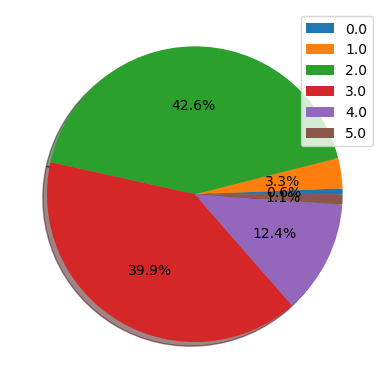

In [4]:
# Importing the data into a data variable 
df = pd.read_csv('winequality-red.csv', header = 0, delimiter=';')
headers = df.columns
data = df.values

# Obtaining the feature matrix into the variable X
#X = data[:,:-1]
X = df.drop(['fixed acidity','quality'], axis=1)
feature_names = headers[:-1]
y = data[:,11]
y = y-3
output_names = headers[11]

# Splitting the data set to training and test sets
# with test_size = 30%
X_train, X_test, y_train, y_test = skm.train_test_split(X,y,test_size = 0.3, random_state=42)

scaler = preprocessing.MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

unique_values, counts = np.unique(y, return_counts=True)

plt.pie(counts,shadow=True,autopct='%.1f%%')
plt.legend(unique_values)
plt.show()

In [5]:
best_train_acc = 0.0
best_test_acc = 0.0
best_test_nodes = 160
best_train_nodes = 160

# Setting a range of hidden node sizes to test
# from 10 to 100 in incremenets of 1
hidden_node_sizes = range(160, 161, 1)
layer_size = range(6,7,1)

# Initializing variables to store best accuracy and hidden node size
accuracy_list = []

# Iterating through the range of hidden node sizes

for layer in layer_size:
    
    for hidden_node in hidden_node_sizes:

        # Creating the MLP Classifier using the hidden_node_sizes variable
        # on each iteration
        mlp = MLPRegressor(hidden_layer_sizes=((hidden_node,)*layer)\
                            ,max_iter=10000,\
                            random_state=30, activation='relu',alpha=0.01)

        # Fitting the MLP on the training data set
        mlp.fit(X_train, y_train)

        # Making predictions on the test and training set
        y_pred_test_raw = mlp.predict(X_test)
        y_pred_test = np.around(y_pred_test_raw)
        y_pred_train = mlp.predict(X_train)
        y_pred_train = np.around(y_pred_train)
        # Calculating the accuracy
        accuracy_test = accuracy_score(y_test, y_pred_test)
        accuracy_train = accuracy_score(y_train,y_pred_train)
        if accuracy_test > best_test_acc:
            best_test_nodes = hidden_node
            best_test_acc = accuracy_test
        if accuracy_train > best_train_acc:
            best_train_nodes = hidden_node
            best_train_acc = accuracy_train
        # accuracy_list.append(accuracy)

print(f'best test nodes ={best_test_nodes}')
print(f'best test accuracy ={best_test_acc}')
print(f'best train nodes ={best_train_nodes}')
print(f'best train accuracy ={best_train_acc}')

best test nodes =160
best test accuracy =0.6520833333333333
best train nodes =160
best train accuracy =0.998212689901698


In [6]:
misclassed_label = []
misclassed_output = []
for i in range(len(y_test)):
    if y_pred_test[i] != y_test[i]:
        misclassed_label.append(y_test[i])
        misclassed_output.append(y_pred_test_raw[i])
misclassed_label = np.array(misclassed_label)
misclassed_output = np.array(misclassed_output)

Text(0.5, 1.0, 'histogram of quality misclassified instances in test set')

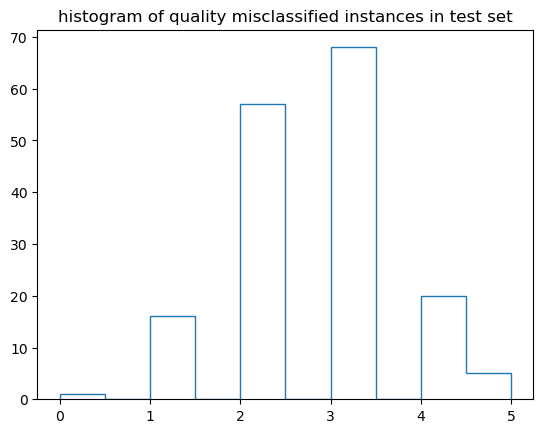

In [7]:
counts, bins = np.histogram(misclassed_label)
plt.stairs(counts, bins)
plt.title('histogram of quality misclassified instances in test set')

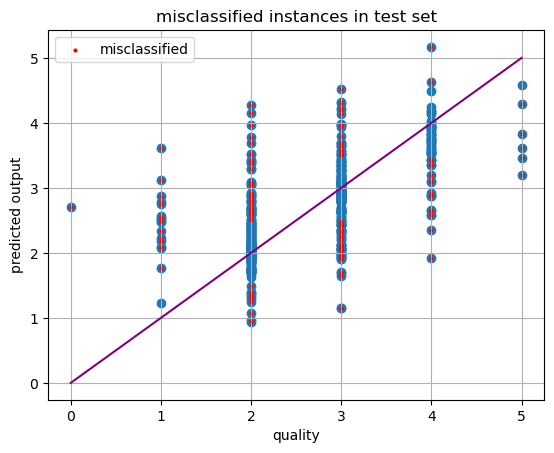

In [10]:
plt.scatter(y_test, y_pred_test_raw)
plt.scatter(misclassed_label, misclassed_output, color='red', s=4, label='misclassified')
plt.plot([0, 1, 2, 3, 4, 5], color='purple')
plt.grid()
plt.title('misclassified instances in test set')
plt.ylabel('predicted output')
plt.xlabel('quality')
plt.legend()
plt.show()

In [3]:
hidden_node_test = range(158,159,1)
hidden_layer_test = range(1,2,1)

# Define the parameter grid for GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(hidden_node,) * hidden_layer \
                        for hidden_node in hidden_node_test \
                        for hidden_layer in hidden_layer_test],
    #'activation': ['relu','tanh','logistic'],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.001,0.01],
    'learning_rate': ['constant'],
    'learning_rate_init': [0.1]
}

mlp = MLPRegressor(max_iter=1000, random_state=42)

# Perform a grid search using cross-validation
grid_search = GridSearchCV(mlp, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding accuracy
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best accuracy: {grid_search.best_score_}")

# Evaluate the best model on the test set
y_pred = grid_search.predict(X_test)
y_pred = np.around(y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {accuracy}")

/Users/jkevin/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
